# E2a: Küchentischversuch zum Laval-Rotor

Name: Diogo Fernandes Costa

Datum: 13.12.2023

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie gut können die Schwingungen verschiedener Haushaltsgeräte erfasst und später analysiert werden?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![picture_smartphone.jpg](pictures/picture_smartphone.jpg)

- Beschreibung des Aufbaus: Der Beschleunigungssensor wird mittels Klebeband an meinem Smartphone fixiert und auf den Tisch gelegt.
- Vorgangsbeschreibung: Der beschriebene Versuchsaufbau wird erledigt und danach misst der Beschleunigungssensor für 20 Sekunden die Beschleunigungen in X-,Y-,Z-Richtung, während bei dem Smartphone der Wecker angeht und ein gewisses Vibrationsmuster ausübt.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py as h5
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240106_174405_DiogoFernandesCosta_smartphone" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240106_174405_DiogoFernandesCosta_smartphone.h5"

path_to_file = "measurement_data/data_20240106_174405_DiogoFernandesCosta_smartphone/data_20240106_174405_DiogoFernandesCosta_smartphone.h5"

# replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240106_174405_DiogoFernandesCosta_smartphone/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240106_174405_DiogoFernandesCosta_smartphone/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240106_174405_DiogoFernandesCosta_smartphone/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99be2-c9d2-609e-90c9-4236def74566": {
    "type": "probe",
    "name": "smartphone",
    "comment":

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
file = h5.File(path_to_file, 'r')

rawdata = file.get("RawData")

data = rawdata.get("1ee847be-fddd-6ee4-892a-68c4555b0981")

        
time = np.array(data['timestamp'])
acceleration_x = np.array(data['acceleration_x'])
acceleration_y = np.array(data['acceleration_y'])
acceleration_z = np.array(data['acceleration_z'])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
abb_vek_pp = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'Δt')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


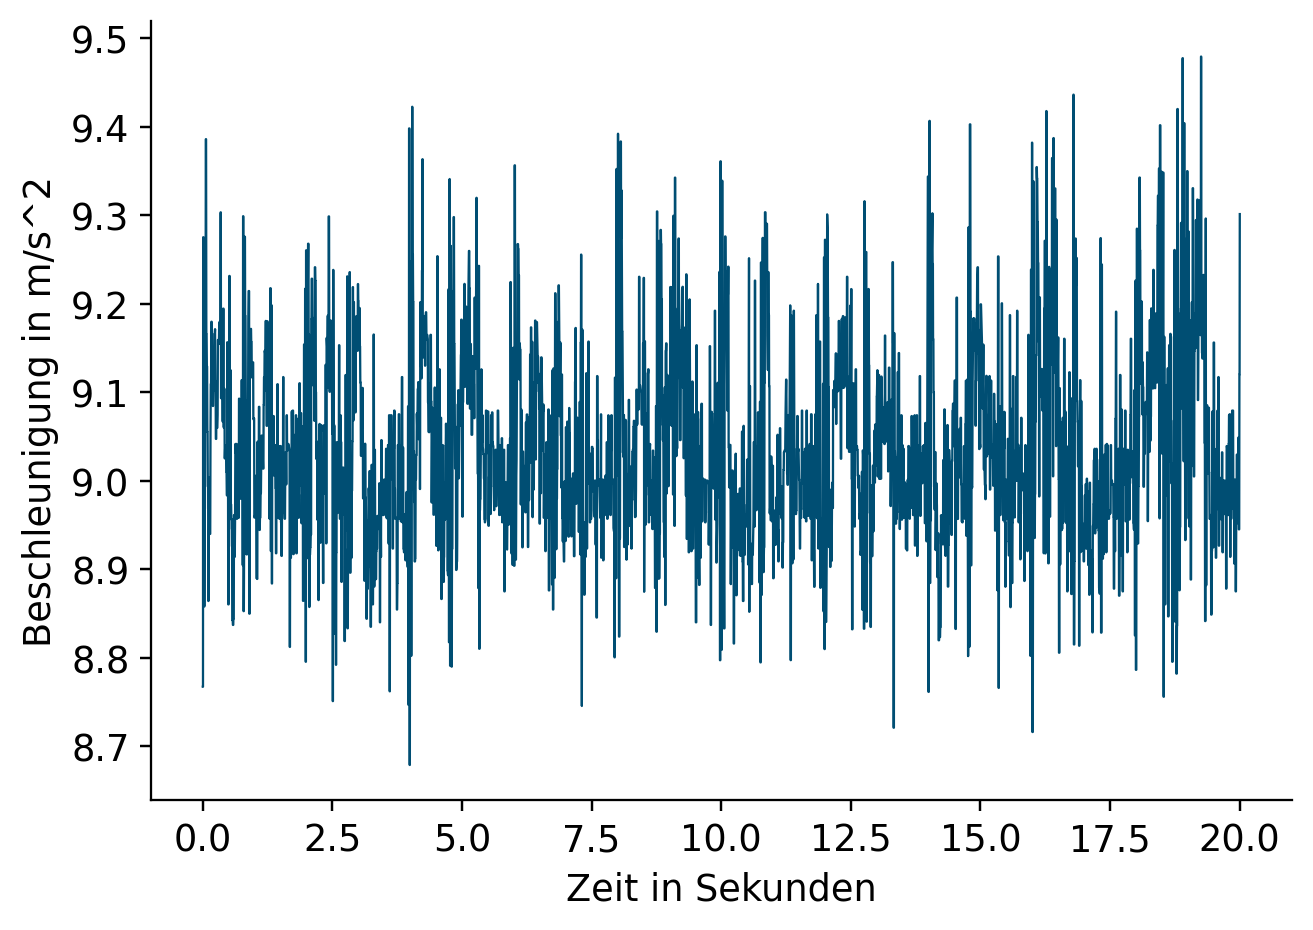

In [6]:
fig = plt.figure()
plt.plot(time, abb_vek_pp)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')

delta_t_liste = []
for i in range(1, (len(time))):
    delta_t_liste.append(time[i] - time[i-1])
    
fig2 = plt.figure()
plt.plot(delta_t_liste, '.')
plt.xlabel('Zeitschritte')
plt.ylabel('Δt')

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
interpolierte_daten = interpolation(time, abb_vek_pp)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
X_oneside, f_oneside = my_fft(interpolierte_daten, time)

fig2 = plt.figure()
plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Text(0, 0.5, 'Amplitude')

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

![picture_laptop.jpg](pictures/picture_laptop.jpg)

- Beschreibung des Aufbaus: Der Beschleunigungssensor wird mittels Klebeband an dem Lautsprecher meines Laptops fixiert und auf den Tisch gelegt.

- Vorgangsbeschreibung: Der beschriebene Versuchsaufbau wird erledigt und danach misst der Beschleunigungssensor für 20 Sekunden die Beschleunigungen in X-,Y-,Z-Richtung, während bei dem Laptop ein basslastiges Musikvideo abgespielt wird. Das Musikvideo ist folgendes: https://www.youtube.com/watch?v=T6szBIcBAd8&list=WL&index=1

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240110_185144_DiogoFernandesCosta_laptop" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240110_185144_DiogoFernandesCosta_laptop.h5"

path_to_file = "measurement_data/data_20240110_185144_DiogoFernandesCosta_laptop/data_20240110_185144_DiogoFernandesCosta_laptop.h5"

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240110_185144_DiogoFernandesCosta_laptop/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240110_185144_DiogoFernandesCosta_laptop/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240110_185144_DiogoFernandesCosta_laptop/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee99be5-39eb-6711-8ab6-347a1ec6f25c": {
    "type": "probe",
    "name": "laptop",
    "comment": "",
    "path":

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
file = h5.File(path_to_file, 'r')


rawdata = file.get("RawData")


data = rawdata.get("1ee847be-fddd-6ee4-892a-68c4555b0981")

        
time = np.array(data['timestamp'])
acceleration_x = np.array(data['acceleration_x'])
acceleration_y = np.array(data['acceleration_y'])
acceleration_z = np.array(data['acceleration_z'])



#### 2. Betrag der Beschleunigung berechnen


In [11]:
abb_vek_pp = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)


#### 3. Darstellung der Messdaten

Text(0, 0.5, 'Δt')

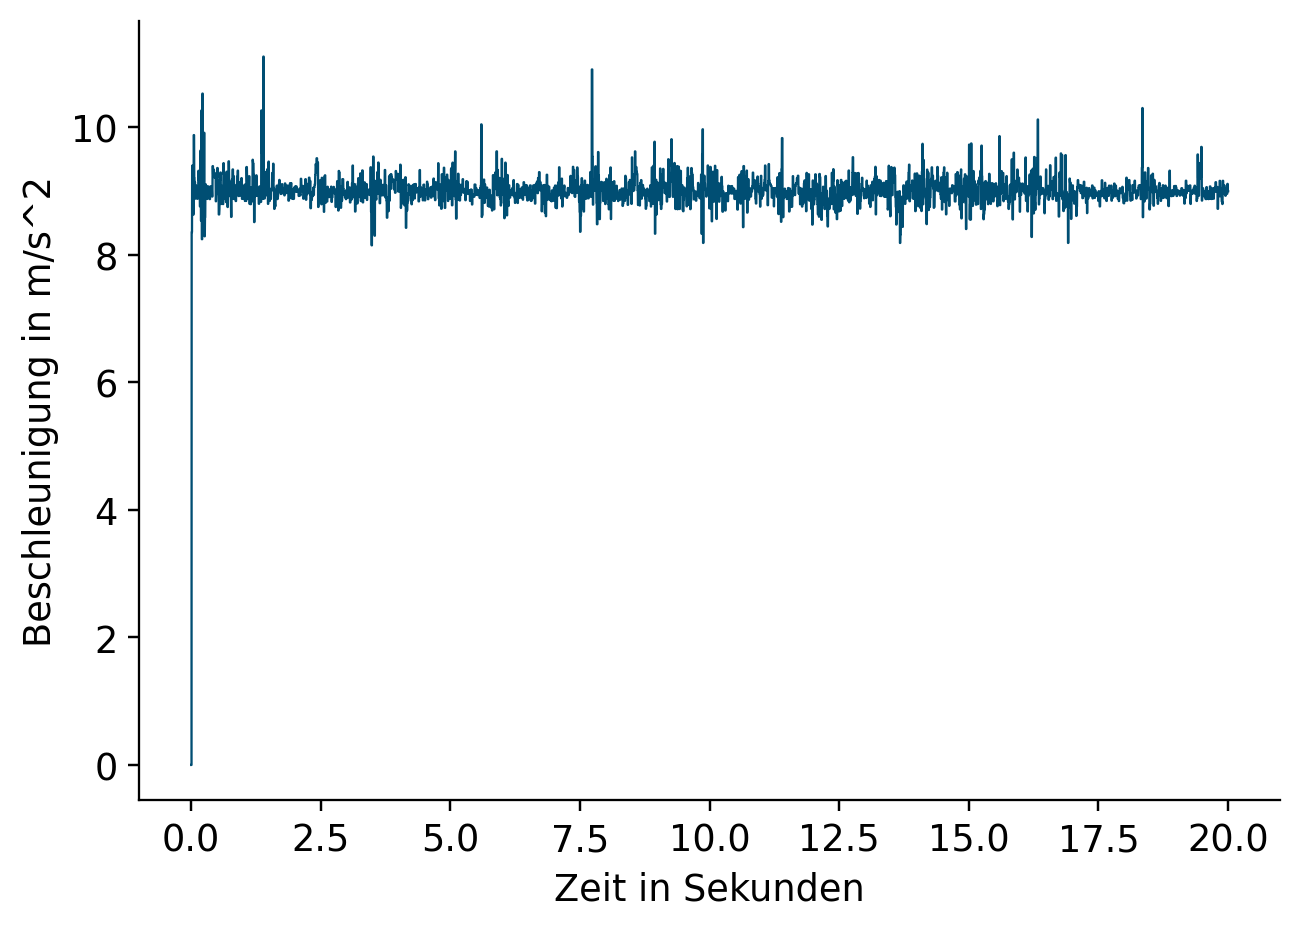

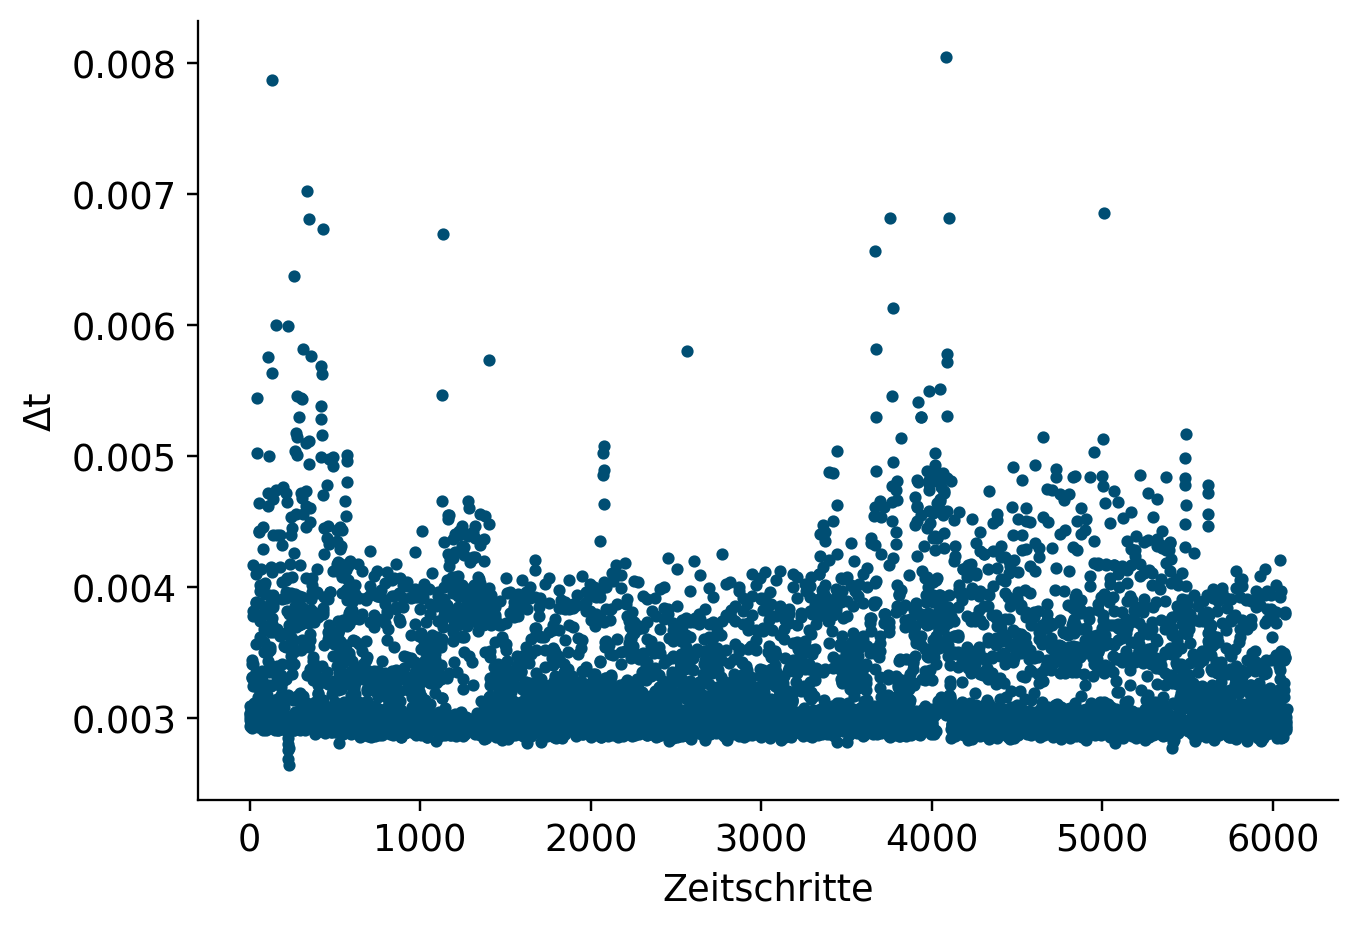

In [12]:
fig = plt.figure()
plt.plot(time, abb_vek_pp)
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Beschleunigung in m/s^2')

delta_t_liste = []
for i in range(1, (len(time))):
    delta_t_liste.append(time[i] - time[i-1])
    
fig2 = plt.figure()
plt.plot(delta_t_liste, '.')
plt.xlabel('Zeitschritte')
plt.ylabel('Δt')

#### 4. Interpolation der Messwerte



In [13]:
interpolierte_daten = interpolation(time, abb_vek_pp)

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'Amplitude')

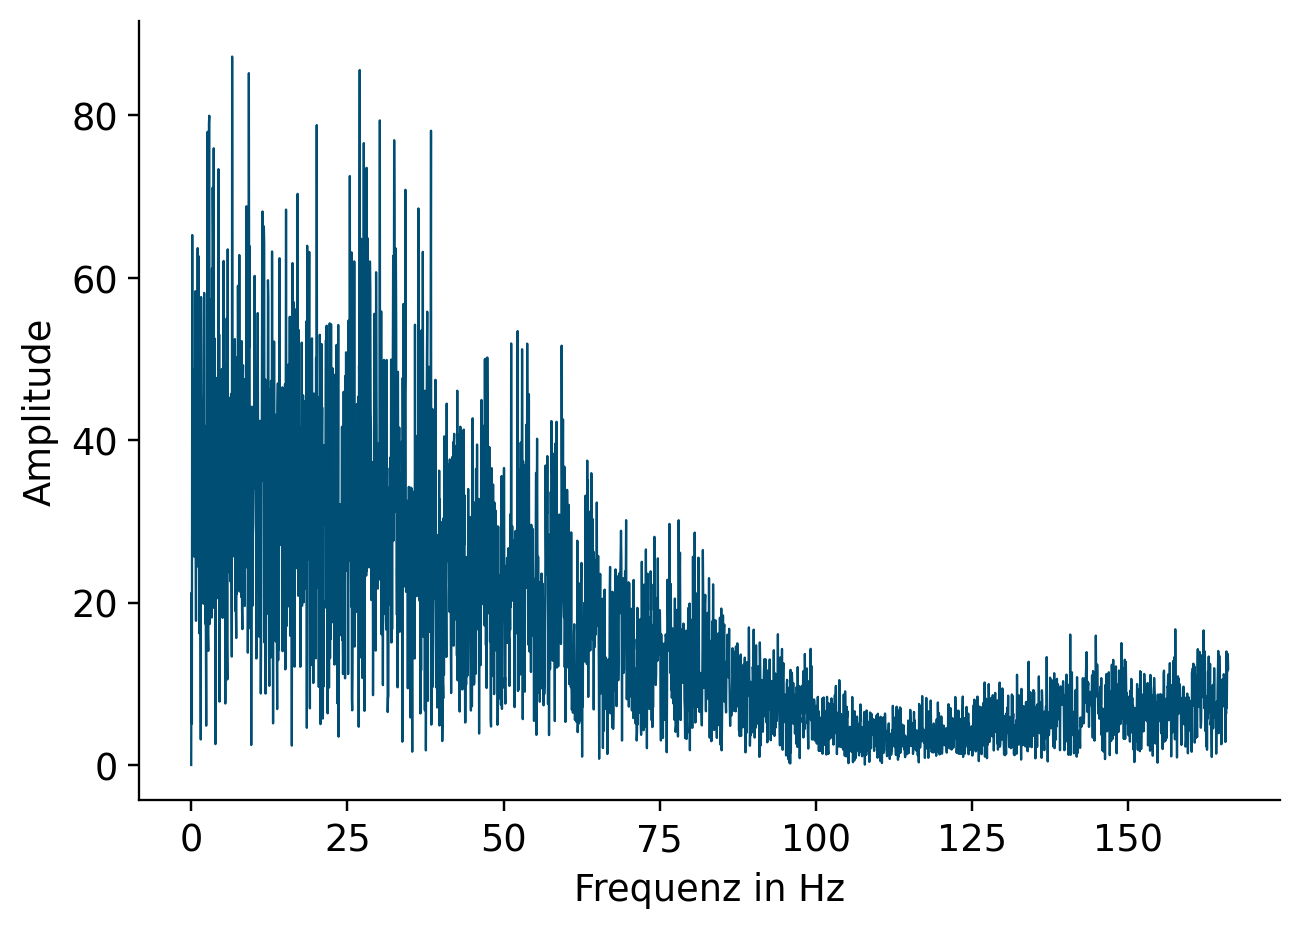

In [14]:
X_oneside, f_oneside = my_fft(interpolierte_daten, time)

fig2 = plt.figure()
plt.plot(f_oneside, np.abs(X_oneside))
plt.xlabel('Frequenz in Hz')
plt.ylabel('Amplitude')

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Anhand der Diagramme ist zu erkennen, dass sich beide Haushaltsgeräte ungefähr im gleichen Frequenzspektrum befinden, wobei der Versuch mit dem Lautsprecher des Laptops größere Peaks der Beschleunigungen von zum Beispiel 10,4 m/s^2 aufweist, während die Vibration des Smartphones nur einen Beschleunigungspeak von 9,4 m/s^2 zeigt.

Die beiden Messungen konnte ich mit keinerlei Problemen durchführen und konnte somit auf plausible Messergebnissen schließen. Nichtsdestotrotz kam es bei dem Anfang der Messung des Versuches mit dem Laptop zu einer kleinen Bewegung mit meiner Hand, was in einen kleinen Peak resultierte. Trotzdem sind beide Experimente gut abgelaufen und es ist zu erkennen, dass die beiden Haushaltsgeräte ähnliche Schwingungscharakteristiken aufweisen. Da ich mich am Tisch befinde und mich selbst leicht bewege kann es teilweise zu kleinen Abweichungen in den Signalen kommen.

Anhand der Darstellung der Zeitschritte ist jedoch zu erwähnen, dass sie sehr stark variieren und der Raspberry Pi inklusive Sensor nicht sehr genau sind.

Somit ist zu erwähnen, dass man einen genaueren Sensor als auch eine bessere Versuchsumgebung wählen sollte, um noch bessere Resultate zu erreichen und mögliche Fehlerketten zu minimieren.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Alles in allem haben mir die Versuche als auch das Handhaben mit dem Beschleunigungssensor Spaß gemacht, da es das erste Mal war, dass ich in der Praxis Schwingungen verschiedener Systeme messe und analysiere. Ich habe kennengelernt, wie ich unterschiedliche Fehlerquellen minimieren kann, um somit die Resultate noch genauer zu gestalten und ein hochqualitatives Ergebnis zu erhalten.

Somit empfinde ich die Versuche in Anbetracht der Ergebnisse und Wissenserweiterung als gelungen.